In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,10)
ylim=(-10, 10)
alpha=1
marker='.'
s=1
legend=True
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
WT__Dpf_3_null_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_htseq_count_alignment_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")

No          13915
FDR<0.05     3234
Name: Significant, dtype: int64

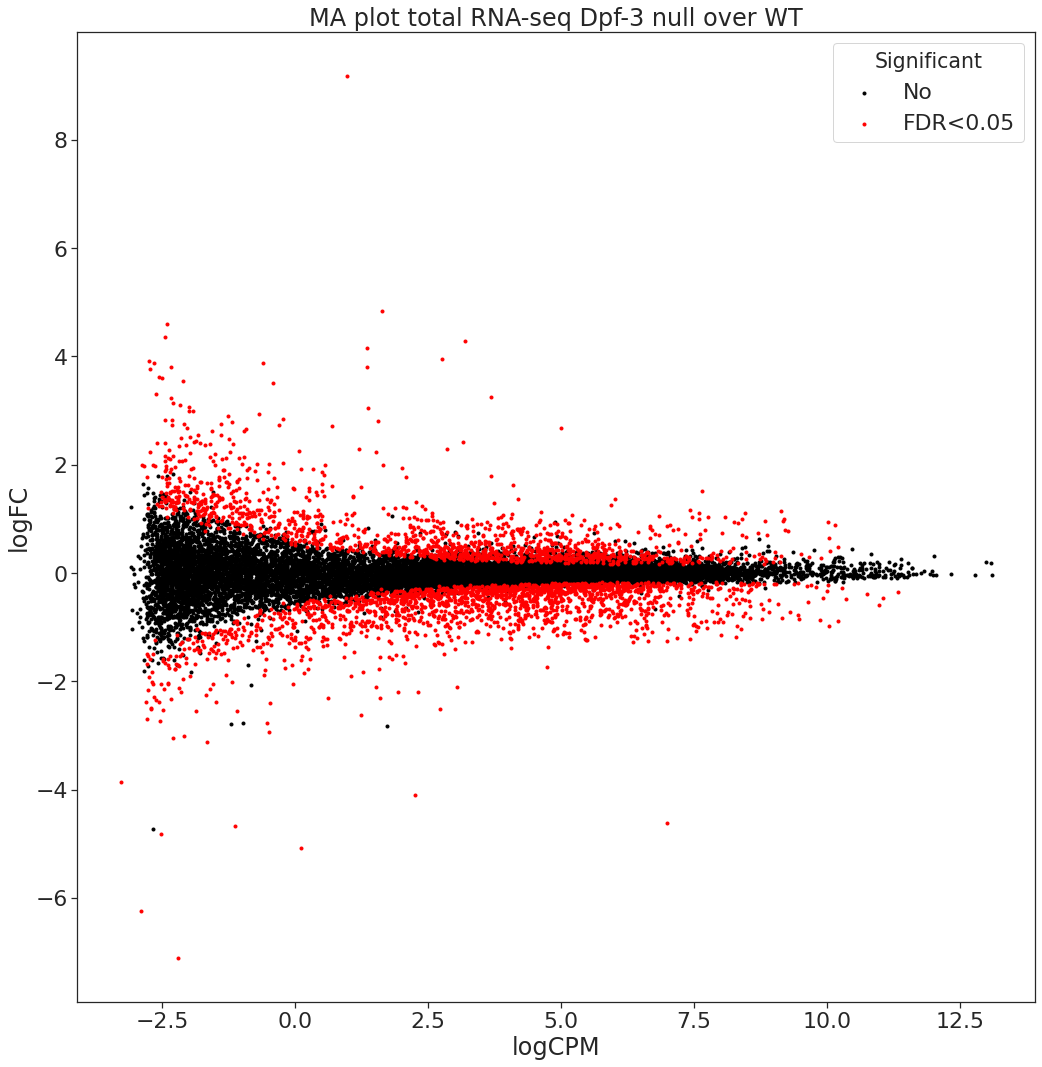

In [4]:
WT__Dpf_3_null_total_RNA["Significant"] = "No"
WT__Dpf_3_null_total_RNA.loc[WT__Dpf_3_null_total_RNA["FDR"]<0.05, "Significant"] = "FDR<0.05"

sns_plot = sns.lmplot(x=f"logCPM",
                      y=f"logFC",
                      data=WT__Dpf_3_null_total_RNA,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", "FDR<0.05"],
                      palette=["black", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot total RNA-seq Dpf-3 null over WT")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

plt.savefig("Dpf-3_null_over_WT.pdf")

WT__Dpf_3_null_total_RNA["Significant"].value_counts()

In [5]:
IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP = pd.read_csv("../../comparisons/IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP_plot.tsv",
                                                        header=0,
                                                        sep="\t")

In [6]:
IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP["Significant_IP_csr-1__over__csr-1_input"].value_counts()

IP_WAGO_1_dpf_3_null_specific                       210
FDR<0.05\nlogFC>0\nIP_WAGO_1_dpf_3_null_specific    145
FDR<0.05\nlogFC<0\nIP_WAGO_1_dpf_3_null_specific     96
Name: Significant_IP_csr-1__over__csr-1_input, dtype: int64

In [7]:
WT__Dpf_3_null_total_RNA.loc[(WT__Dpf_3_null_total_RNA["id"].isin(IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP["id"].to_list())) &
                             (WT__Dpf_3_null_total_RNA["FDR"]>=0.05),
                             "Significant"] = "No\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP"

In [8]:
WT__Dpf_3_null_total_RNA.loc[(WT__Dpf_3_null_total_RNA["id"].isin(IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP["id"].to_list())) &
                             (WT__Dpf_3_null_total_RNA["FDR"]<0.05),
                             "Significant"] = "FDR<0.05\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP"

In [9]:
WT__Dpf_3_null_total_RNA["Significant"].value_counts()

No                                                     13515
FDR<0.05                                                3196
No\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP            400
FDR<0.05\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP       38
Name: Significant, dtype: int64

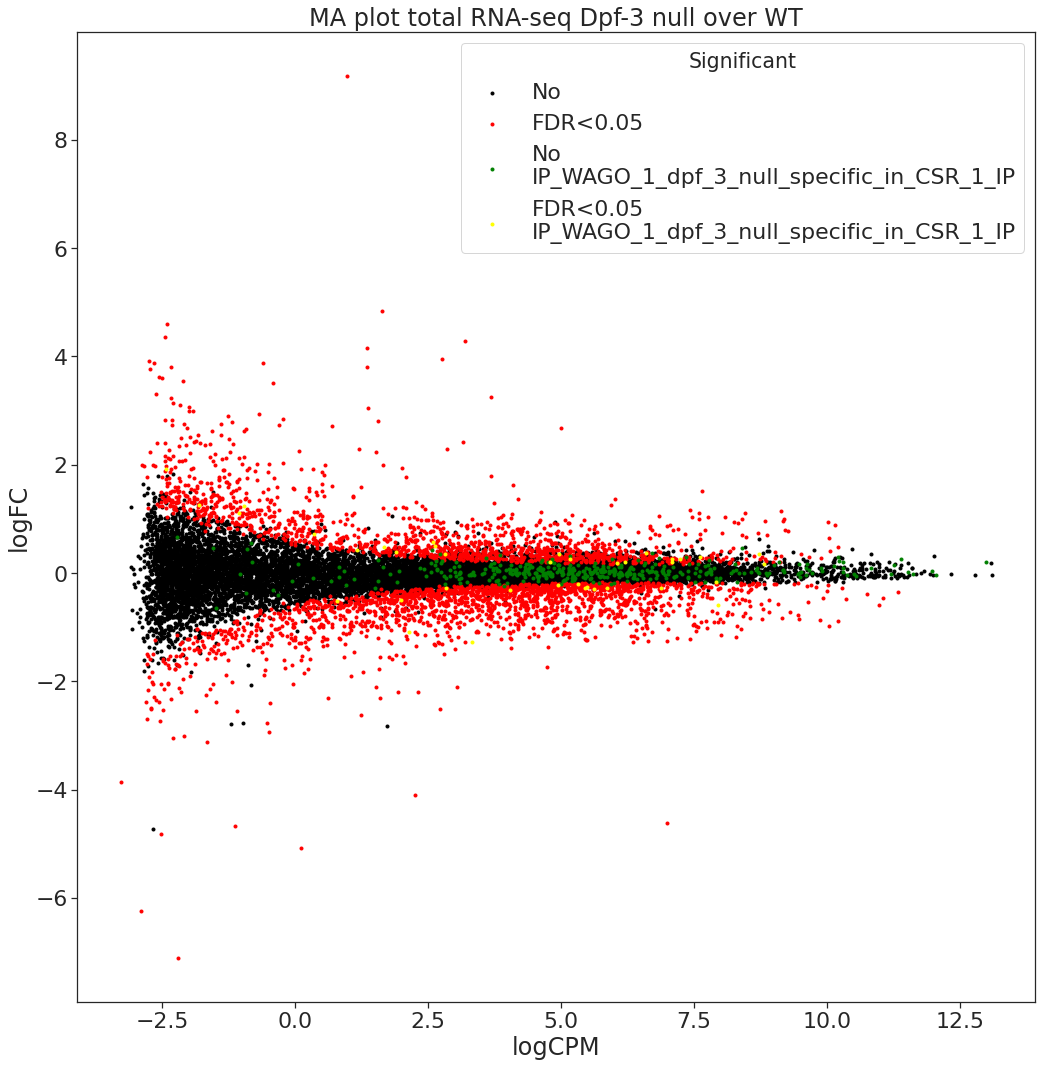

In [10]:
sns_plot = sns.lmplot(x=f"logCPM",
                      y=f"logFC",
                      data=WT__Dpf_3_null_total_RNA,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", "FDR<0.05", "No\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP", "FDR<0.05\nIP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP", ],
                      palette=["black", "red", "green", "yellow"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot total RNA-seq Dpf-3 null over WT")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

plt.savefig("Dpf-3_null_over_WT_IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP.pdf")